## Flower Photos Classification Task

https://www.kaggle.com/competitions/mds-misis-dl-flower-photos-classificationn

In this task the feature extraction strategy is used. <br>
VGG-11 with batch normalization is used as a pretrained model.

---

Since most of dataloading and transforming functionality is the same for most projects,
it was extracted into separate python files and just imported into the notebook.

In [1]:
import gc

import numpy as np
import pandas as pd
import torch

from dataset_utils import create_dataset, get_categories
from vgg_model_wrapper import VggModelWrapper

In [2]:
DATA_ROOT_DIR = '../data/'
IMGS_DIR = 'flower_photos'
SAMPLE_SUBMISSION_FILE = 'sample_submission.csv'

In [3]:
# Cuda maintenance
gc.collect()
torch.cuda.empty_cache()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Torch device: ", device)

Torch device:  cuda


In [4]:
categories_names = get_categories(DATA_ROOT_DIR, IMGS_DIR)
model_wrapper = VggModelWrapper(len(categories_names), device)

In [5]:
train_dataset, train_validation_dataset = create_dataset(model_wrapper.get_expected_img_size(), DATA_ROOT_DIR,
                                                                 IMGS_DIR, SAMPLE_SUBMISSION_FILE)

sunflowers
tulips
roses
daisy
dandelion


In [6]:
val_acc_history = model_wrapper.train(train_dataset, train_validation_dataset, True)

Epoch 0/49
----------


/home/nastya/.local/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train Loss: 1.1014 Acc: 0.6095
val Loss: 0.6205 Acc: 0.8129

Epoch 1/49
----------
train Loss: 0.6436 Acc: 0.7896
val Loss: 0.4907 Acc: 0.8469

Epoch 2/49
----------
train Loss: 0.5652 Acc: 0.8096
val Loss: 0.4318 Acc: 0.8707

Epoch 3/49
----------
train Loss: 0.5195 Acc: 0.8305
val Loss: 0.3972 Acc: 0.8844

Epoch 4/49
----------
train Loss: 0.5039 Acc: 0.8305
val Loss: 0.3848 Acc: 0.8878

Epoch 5/49
----------
train Loss: 0.4835 Acc: 0.8305
val Loss: 0.3705 Acc: 0.8759

Epoch 6/49
----------
train Loss: 0.4787 Acc: 0.8360
val Loss: 0.3571 Acc: 0.8895

Epoch 7/49
----------
train Loss: 0.4525 Acc: 0.8403
val Loss: 0.3469 Acc: 0.8929

Epoch 8/49
----------
train Loss: 0.4498 Acc: 0.8445
val Loss: 0.3391 Acc: 0.8980

Epoch 9/49
----------
train Loss: 0.4320 Acc: 0.8531
val Loss: 0.3338 Acc: 0.9014

Epoch 10/49
----------
train Loss: 0.4252 Acc: 0.8501
val Loss: 0.3280 Acc: 0.8946

Epoch 11/49
----------
train Loss: 0.4290 Acc: 0.8484
val Loss: 0.3287 Acc: 0.8946

Epoch 12/49
----------
t

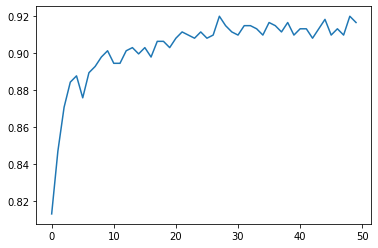

In [16]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

acc = [epoch_result.item() for epoch_result in val_acc_history]
plt.plot(acc)

In [30]:
dataset_for_submission = create_dataset(model_wrapper.get_expected_img_size(), DATA_ROOT_DIR, IMGS_DIR,
                                        SAMPLE_SUBMISSION_FILE, False)
submission_results, img_names_column = model_wrapper.predict(dataset_for_submission)

In [33]:
import pathlib

# Write results into submission file
sample_submission = pd.read_csv('../data/sample_submission.csv')
labels_mapping = {'tulips': 'TULIP',
                  'daisy': 'DAISY',
                  'sunflowers': 'SUNFLOWER',
                  'dandelion': 'DANDELION',
                  'roses': 'ROSE'}

sample_submission['Category'] = [labels_mapping[categories_names[index]] for index in
                                 np.concatenate(submission_results)]
sample_submission['Id'] = [pathlib.Path(*pathlib.Path(p).parts[2:]) for p in np.concatenate(img_names_column)]

sample_submission.to_csv('flowers_submission.csv', index=False)

In [38]:
sample_submission.head()

,Id,Category
0,flower_photos/daisy/253426762_9793d43fcd.jpg,DAISY
1,flower_photos/sunflowers/969913643_9d5cd2fe45_...,SUNFLOWER
2,flower_photos/dandelion/7148085703_b9e8bcd6ca_...,DANDELION
3,flower_photos/tulips/141479422_5a6fa1fd1b_m.jpg,TULIP
4,flower_photos/dandelion/8058286066_acdf082487_...,DANDELION


In [58]:
# Visualize random sample and predicted label

import matplotlib.pyplot as plt
from random import randrange

iterator = iter(dataset_for_submission)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


../data/flower_photos/sunflowers/184682920_97ae41ce60_m.jpg
SUNFLOWER


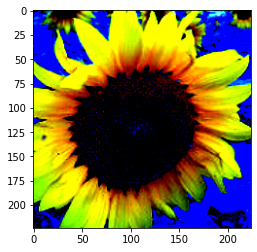

In [94]:
sample = next(iterator)
image = sample[2]
name = sample[1]
print(name)
index = img_names_column[0].index(name)
plt.imshow(image.permute(1, 2, 0))
print(sample_submission['Category'][index])